# Sales Performance Analysis of a Product

### Merging all the months data

In [52]:
import pandas as pd
from glob import glob

file_name = sorted(glob('./df1/Sales*.csv'))
df = pd.concat((pd.read_csv(f) for f in file_name))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,187894,27in FHD Monitor,1,149.99,04/28/19 13:06,"42 Highland St, Atlanta, GA 30301"
1,187895,AA Batteries (4-pack),3,3.84,04/01/19 20:54,"647 14th St, Austin, TX 73301"
2,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215"
3,187897,AAA Batteries (4-pack),1,2.99,04/23/19 18:10,"84 Maple St, Los Angeles, CA 90001"
4,187898,Macbook Pro Laptop,1,1700.0,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [53]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,187894,27in FHD Monitor,1,149.99,04/28/19 13:06,"42 Highland St, Atlanta, GA 30301"
1,187895,AA Batteries (4-pack),3,3.84,04/01/19 20:54,"647 14th St, Austin, TX 73301"
2,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215"
3,187897,AAA Batteries (4-pack),1,2.99,04/23/19 18:10,"84 Maple St, Los Angeles, CA 90001"
4,187898,Macbook Pro Laptop,1,1700.0,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016"


# Cleaning the Data

### Tell us how many total NaN values are there

In [54]:
df.isna().sum().sum()

1020

### This will display the raws which have NaN values

In [55]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


### Now Dropping All the NaN values

In [77]:
df = df.dropna(how ='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,187894,27in FHD Monitor,1,149.99,04/28/19 13:06,"42 Highland St, Atlanta, GA 30301"
1,187895,AA Batteries (4-pack),3,3.84,04/01/19 20:54,"647 14th St, Austin, TX 73301"
2,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215"
3,187897,AAA Batteries (4-pack),1,2.99,04/23/19 18:10,"84 Maple St, Los Angeles, CA 90001"
4,187898,Macbook Pro Laptop,1,1700.0,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Removing the Duplicate header rows

In [78]:
df = df[df['Order Date'].str[0:2] !='Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,187894,27in FHD Monitor,1,149.99,04/28/19 13:06,"42 Highland St, Atlanta, GA 30301"
1,187895,AA Batteries (4-pack),3,3.84,04/01/19 20:54,"647 14th St, Austin, TX 73301"
2,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215"
3,187897,AAA Batteries (4-pack),1,2.99,04/23/19 18:10,"84 Maple St, Los Angeles, CA 90001"
4,187898,Macbook Pro Laptop,1,1700.0,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Additional columns

### Month column

In [94]:
# df['Month'] = pd.to_datetime(df['Order Date']).dt.month
# or
df.loc[:, 'Month'] = pd.to_datetime(df.loc[:, 'Order Date']).dt.month
df.head()

<ipython-input-94-e4da2df4f880>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = pd.to_datetime(df.loc[:, 'Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,187894,27in FHD Monitor,1,149.99,04/28/19 13:06,"42 Highland St, Atlanta, GA 30301",4
1,187895,AA Batteries (4-pack),3,3.84,04/01/19 20:54,"647 14th St, Austin, TX 73301",4
2,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215",4
3,187897,AAA Batteries (4-pack),1,2.99,04/23/19 18:10,"84 Maple St, Los Angeles, CA 90001",4
4,187898,Macbook Pro Laptop,1,1700.00,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016",4


### Sales column

In [98]:
# df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
#  or
df.loc[:, 'Sales'] = df.loc[:, 'Quantity Ordered'].astype('int') * df.loc[:, 'Price Each'].astype('float')
df.head()

<ipython-input-98-093bf74e4378>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Sales'] = df.loc[:, 'Quantity Ordered'].astype('int') * df.loc[:, 'Price Each'].astype('float')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,187894,27in FHD Monitor,1,149.99,04/28/19 13:06,"42 Highland St, Atlanta, GA 30301",4,149.99
1,187895,AA Batteries (4-pack),3,3.84,04/01/19 20:54,"647 14th St, Austin, TX 73301",4,11.52
2,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215",4,99.99
3,187897,AAA Batteries (4-pack),1,2.99,04/23/19 18:10,"84 Maple St, Los Angeles, CA 90001",4,2.99
4,187898,Macbook Pro Laptop,1,1700.00,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016",4,1700.00


### City column

In [104]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

# df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
# or
df.loc[:, 'City'] = df.loc[:, 'Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

<ipython-input-104-b6e56f684b5c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'City'] = df.loc[:, 'Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,187894,27in FHD Monitor,1,149.99,04/28/19 13:06,"42 Highland St, Atlanta, GA 30301",4,149.99,Atlanta (GA)
1,187895,AA Batteries (4-pack),3,3.84,04/01/19 20:54,"647 14th St, Austin, TX 73301",4,11.52,Austin (TX)
2,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215",4,99.99,Boston (MA)
3,187897,AAA Batteries (4-pack),1,2.99,04/23/19 18:10,"84 Maple St, Los Angeles, CA 90001",4,2.99,Los Angeles (CA)
4,187898,Macbook Pro Laptop,1,1700.00,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016",4,1700.00,San Francisco (CA)


# Data Exploration

### Question 1: What was the best month for sales? How much was earned that month?

In [111]:
df.groupby('Month')['Sales'].sum()

Month
1     1813818.37
2     2202022.42
3      580179.00
4     1212928.38
5      888514.45
6      349045.55
7      500441.74
8     2242323.25
9     2097560.13
10    1517380.19
11    1018660.01
12     256485.10
Name: Sales, dtype: float64

In [112]:
df_monthly = df.groupby('Month')['Sales'].sum()  # Group by month and sum of sales
best_month = df_monthly.idxmax()  # Get the index (month number) of the highest sales month
total_earnings = df_monthly.max()  # Get the total earnings for the highest sales month

print(f"The best month for sales was {best_month}, with earnings of ${total_earnings:.2f}")

The best month for sales was 8, with earnings of $2242323.25


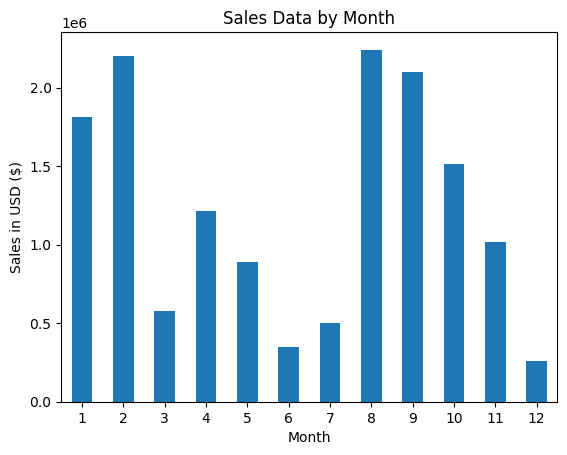

In [123]:
import matplotlib.pyplot as plt

# Create a bar plot of earnings by month
df_monthly.plot(kind='bar', rot=0)
plt.title('Sales Data by Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.show()

### Question 2: What city sold the most product?

In [122]:
df.groupby('City')['Quantity Ordered'].sum()

City
Atlanta  (GA)           6937
Austin  (TX)            4789
Boston  (MA)            9481
Dallas  (TX)            7230
Los Angeles  (CA)      14168
New York City  (NY)    11888
Portland  (ME)          1200
Portland  (OR)          4780
San Francisco  (CA)    21234
Seattle  (WA)           7030
Name: Quantity Ordered, dtype: int64

### Question 3: Which Product has the maximum and minimum number of sales?

In [131]:
df.groupby('Product')['Sales'].sum()

Product
20in Monitor                   191602.58
27in 4K Gaming Monitor        1055312.94
27in FHD Monitor               494217.05
34in Ultrawide Monitor         989113.97
AA Batteries (4-pack)           44939.52
AAA Batteries (4-pack)          39019.50
Apple Airpods Headphones       998850.00
Bose SoundSport Headphones     568643.13
Flatscreen TV                  612000.00
Google Phone                  1436400.00
LG Dryer                       176400.00
LG Washing Machine             169800.00
Lightning Charging Cable       147227.60
Macbook Pro Laptop            3406800.00
ThinkPad Laptop               1772982.27
USB-C Charging Cable           123312.05
Vareebadd Phone                353200.00
Wired Headphones               103137.98
iPhone                        1996400.00
Name: Sales, dtype: float64

In [130]:
df.groupby('Product')['Sales'].sum()  # Group by product and sum of sales
Max_psales = df.groupby('Product')['Sales'].sum().max() # highest sales
Max_p = df.groupby('Product')['Sales'].sum().idxmax() #highest sales product

Min_psales = df.groupby('Product')['Sales'].sum().min() #least sales
Min_p = df.groupby('Product')['Sales'].sum().idxmin() #least sales product

print(f"{Max_p} has the highest sales of ${Max_psales:.2f}")
print(f"{Min_p} has the least sales of ${Min_psales:.2f}")

Macbook Pro Laptop has the highest sales of $3406800.00
AAA Batteries (4-pack) has the least sales of $39019.50


### Question 4: Which product ordered most number of times?

In [141]:
df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   1742
27in 4K Gaming Monitor         2706
27in FHD Monitor               3295
34in Ultrawide Monitor         2603
AA Batteries (4-pack)         11703
AAA Batteries (4-pack)        13050
Apple Airpods Headphones       6659
Bose SoundSport Headphones     5687
Flatscreen TV                  2040
Google Phone                   2394
LG Dryer                        294
LG Washing Machine              283
Lightning Charging Cable       9848
Macbook Pro Laptop             2004
ThinkPad Laptop                1773
USB-C Charging Cable          10319
Vareebadd Phone                 883
Wired Headphones               8602
iPhone                         2852
Name: Quantity Ordered, dtype: int64

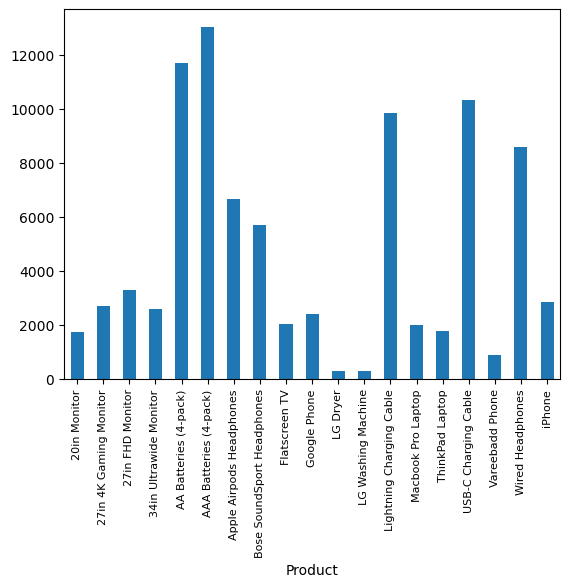

In [140]:
df.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar', rot=0)
plt.xticks(rotation='vertical', size=8)
plt.show()

### Question 5: What time should we display advertisements to maximize likelihood of customer's buying product?

In [142]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df.head()

<ipython-input-142-5ab5857909bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
<ipython-input-142-5ab5857909bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,187894,27in FHD Monitor,1,149.99,04/28/19 13:06,"42 Highland St, Atlanta, GA 30301",4,149.99,Atlanta (GA),13,6
1,187895,AA Batteries (4-pack),3,3.84,04/01/19 20:54,"647 14th St, Austin, TX 73301",4,11.52,Austin (TX),20,54
2,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215",4,99.99,Boston (MA),18,49
3,187897,AAA Batteries (4-pack),1,2.99,04/23/19 18:10,"84 Maple St, Los Angeles, CA 90001",4,2.99,Los Angeles (CA),18,10
4,187898,Macbook Pro Laptop,1,1700.00,04/15/19 14:06,"26 Highland St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),14,6


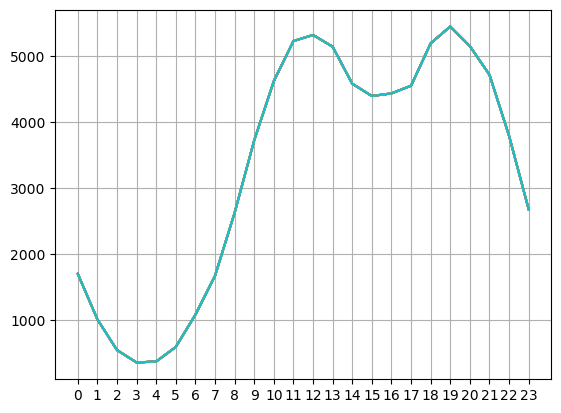

In [146]:
keys = [pair for pair, df in df.groupby('Hour')]

plt.plot(keys, df.groupby(['Hour']).count())
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

### Question 4: What products are most often sold together?

In [149]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df1 = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df1[['Order ID', 'Grouped']].drop_duplicates()
df2

<ipython-input-149-48215d4834d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
38,187932,"Vareebadd Phone,USB-C Charging Cable"
62,187955,"Google Phone,USB-C Charging Cable"
75,187967,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."
80,187970,"Google Phone,USB-C Charging Cable"
89,187978,"Google Phone,Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [154]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))  # We can check for 3 or 4 items also

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable') 445
('iPhone', 'Lightning Charging Cable') 408
('iPhone', 'Wired Headphones') 201
('Google Phone', 'Wired Headphones') 169
('Vareebadd Phone', 'USB-C Charging Cable') 155
('iPhone', 'Apple Airpods Headphones') 148
('Google Phone', 'Bose SoundSport Headphones') 93
('USB-C Charging Cable', 'Wired Headphones') 72
('Vareebadd Phone', 'Wired Headphones') 54
('Lightning Charging Cable', 'Apple Airpods Headphones') 43
